# 붓꽃 데이터 군집화

## 사전작업

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
#to DF
irisDF = pd.DataFrame(data = iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
'''
sepal_length 꽃받침의 길이 정보
sepal_width 꽃받침의 너비 정보
petal_length 꽃잎의 길이 정보
petal_width 꽃잎의 너비 정보 
 
target 꽃의 종류
'''

'\nsepal_length 꽃받침의 길이 정보\nsepal_width 꽃받침의 너비 정보\npetal_length 꽃잎의 길이 정보\npetal_width 꽃잎의 너비 정보 \n \ntarget 꽃의 종류\n'

In [17]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

# K Means

## 실루엣 계수로 최적의 데이터 셋 계산

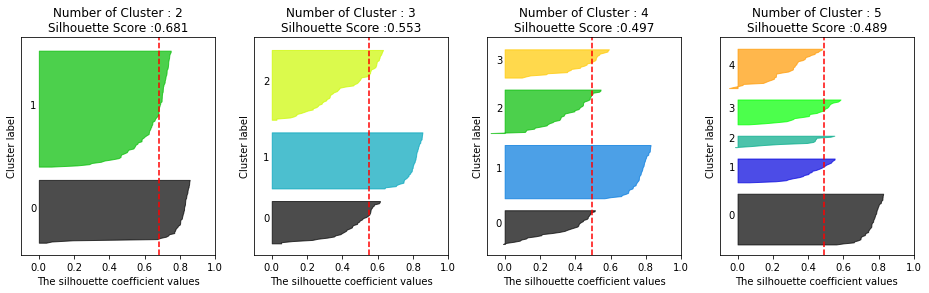

In [19]:
#실루엣 계수를 통해 몇 개의 데이터 셋으로 군집화해야 좋은지 파악 가능.
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
        
visualize_silhouette([ 2, 3, 4, 5 ], iris.data)

## kmeans

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


Text(0.5, 1.0, 'original')

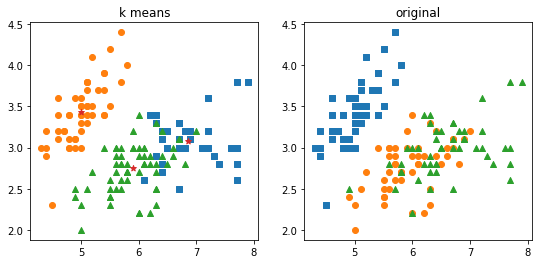

In [10]:
from sklearn.cluster import KMeans

iris_kmeans = irisDF.copy()

kmeans = KMeans(n_clusters=3, max_iter=300, random_state=0)
kmeans.fit(iris_kmeans)

iris_kmeans['target'] = iris.target
iris_kmeans['cluster'] =  kmeans.labels_ #labels_ : 각 데이터가 속한 군집점의 중심 레이블

print(iris_kmeans.groupby(['target','cluster'])['sepal_length'].count())

fig, (ax1, ax2) = plt.subplots(figsize = (9,4), ncols=2)

for i, marker in enumerate(['s','o','^']) :
    x_axis_data = iris_kmeans[iris_kmeans['cluster'] == i]['sepal_length']
    y_axis_data = iris_kmeans[iris_kmeans['cluster'] == i]['sepal_width']
    ax1.scatter(x_axis_data, y_axis_data, marker=marker)
    
ax1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="*")

irisDF_copy = irisDF.copy()
irisDF_copy['target'] = iris.target

for i, marker in enumerate(['s', 'o', '^']) :
    x_axis_data = irisDF_copy[irisDF_copy['target'] == i]['sepal_length']
    y_axis_data = irisDF_copy[irisDF_copy['target'] == i]['sepal_width']
    ax2.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

ax1.set_title('k means')
ax2.set_title('original')

## PCA + Kmeans

     sepal_length  sepal_width  petal_length  petal_width  target  cluster  \
0             5.1          3.5           1.4          0.2       0        1   
1             4.9          3.0           1.4          0.2       0        1   
2             4.7          3.2           1.3          0.2       0        1   
3             4.6          3.1           1.5          0.2       0        1   
4             5.0          3.6           1.4          0.2       0        1   
..            ...          ...           ...          ...     ...      ...   
145           6.7          3.0           5.2          2.3       2        0   
146           6.3          2.5           5.0          1.9       2        2   
147           6.5          3.0           5.2          2.0       2        0   
148           6.2          3.4           5.4          2.3       2        0   
149           5.9          3.0           5.1          1.8       2        2   

        pca_x     pca_y  
0   -2.684126  0.319397  
1   -2.7141

Text(0.5, 1.0, 'Only PCA')

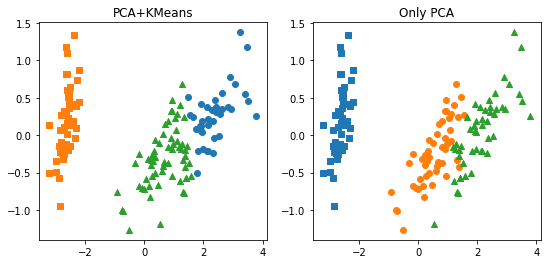

In [11]:
from sklearn.decomposition import PCA

#속성 4개를 가진 붓꽃 데이터를 2차원 평면에서 보기 위해 속성을 2개로 차원축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_kmeans['pca_x'] = pca_transformed[:,0]
iris_kmeans['pca_y'] = pca_transformed[:,1]
print(iris_kmeans)

maker0_ind = iris_kmeans[iris_kmeans['cluster']==0].index
maker1_ind = iris_kmeans[iris_kmeans['cluster']==1].index
maker2_ind = iris_kmeans[iris_kmeans['cluster']==2].index

fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)

ax1.scatter(x=iris_kmeans.loc[maker0_ind,'pca_x'], y=iris_kmeans.loc[maker0_ind, 'pca_y'], marker='o')
ax1.scatter(x=iris_kmeans.loc[maker1_ind,'pca_x'], y=iris_kmeans.loc[maker1_ind, 'pca_y'], marker='s')
ax1.scatter(x=iris_kmeans.loc[maker2_ind,'pca_x'], y=iris_kmeans.loc[maker2_ind, 'pca_y'], marker='^')

ax1.set_title('PCA+KMeans')

iris_pca = pd.DataFrame(pca_transformed, columns=['PCA 1', 'PCA 2'])
iris_pca['target'] = iris.target

for i, marker in enumerate(['s','o','^']) :
    x_axis_data = iris_pca[iris_pca['target'] == i]['PCA 1']
    y_axis_data = iris_pca[iris_pca['target'] == i]['PCA 2']
    ax2.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
ax2.set_title('Only PCA')

#o와 ^는 명확하게 분리되어 있지 않음.
#KMeans의 단점.

## 평균이동

1.2020768127998687
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
target  cluster
0       1          50
1       0          49
        1           1
2       0          50
Name: sepal_length, dtype: int64


Text(0.5, 1.0, 'original')

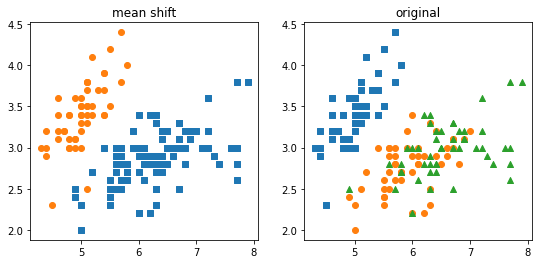

In [77]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy import stats

#최적의 대역폭 계산
bandwidth = estimate_bandwidth(iris.data)

## 2. 실제 혼합 정규분포
X = np.arange(-8,8,0.1)
Y_1 = stats.norm.pdf(X, loc=4.0, scale=2.0)
Y_2 = stats.norm.pdf(X, loc=-1.0, scale=1.0)
Y = 0.5*(Y_1+Y_2)

## 3. 가우시안 커널 밀도 추정
estimator = stats.gaussian_kde(data, bw_method='silverman')
K = estimator(X)

## 4. 그래프 그리기
plt.plot(X, Y, label='Original')
plt.plot(X, K, label='gaussian_kde')
plt.legend(loc='best')
plt.show()

print(bandwidth)

iris_ms = irisDF.copy()

meanshift = MeanShift(bandwidth = bandwidth)
labels = meanshift.fit_predict(iris_ms)

print(labels)

iris_ms['target'] = iris.target
iris_ms['cluster'] =  labels


print(iris_ms.groupby(['target','cluster'])['sepal_length'].count())


fig, (ax1, ax2) = plt.subplots(figsize = (9,4), ncols=2)

for i, marker in enumerate(['s','o','^']) :
    x_axis_data = iris_ms[iris_ms['cluster'] == i]['sepal_length']
    y_axis_data = iris_ms[iris_ms['cluster'] == i]['sepal_width']
    ax1.scatter(x_axis_data, y_axis_data, marker=marker)
    
irisDF_copy = irisDF.copy()
irisDF_copy['target'] = iris.target

for i, marker in enumerate(['s', 'o', '^']) :
    x_axis_data = irisDF_copy[irisDF_copy['target'] == i]['sepal_length']
    y_axis_data = irisDF_copy[irisDF_copy['target'] == i]['sepal_width']
    ax2.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
        
ax1.set_title('mean shift')
ax2.set_title('original')

# GMM

Text(0.5, 1.0, 'gmm')

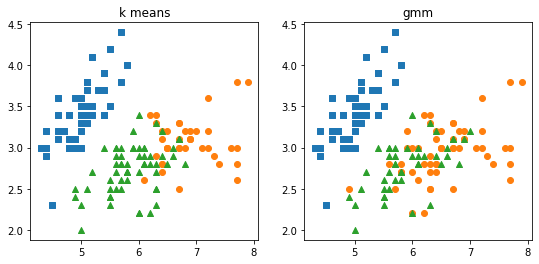

In [79]:
from sklearn.mixture import GaussianMixture

#gmm
gmm = GaussianMixture(n_components=3, random_state = 0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

iris_gmm = irisDF.copy()
iris_gmm['cluster'] = gmm_cluster_labels
iris_gmm['target'] = iris.target

#kmeans
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=0)
kmeans.fit(iris_kmeans)

iris_kmeans['target'] = iris.target
iris_kmeans['cluster'] =  kmeans.labels_ #labels_ : 각 데이터가 속한 군집점의 중심 레이블


#compare
fig, (ax1, ax2) = plt.subplots(figsize = (9,4), ncols=2)

for i, marker in enumerate(['s','o','^']) :
    x_axis_data = iris_kmeans[iris_kmeans['cluster'] == i]['sepal_length']
    y_axis_data = iris_kmeans[iris_kmeans['cluster'] == i]['sepal_width']
    ax1.scatter(x_axis_data, y_axis_data, marker=marker)
    
irisDF_copy = irisDF.copy()
irisDF_copy['target'] = iris.target

for i, marker in enumerate(['s', 'o', '^']) :
    x_axis_data = iris_gmm[iris_gmm['cluster'] == i]['sepal_length']
    y_axis_data = iris_gmm[iris_gmm['cluster'] == i]['sepal_width']
    ax2.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
ax1.set_title('k means')
ax2.set_title('gmm')

# DBSCAN

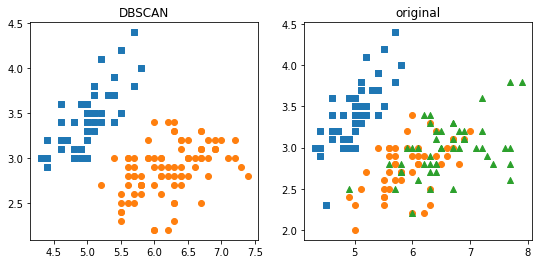

target  cluster
0        0         49
        -1          1
1        1         46
        -1          4
2        1         42
        -1          8
Name: cluster, dtype: int64


In [85]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples = 8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_dbs = irisDF.copy()
iris_dbs['cluster'] = dbscan_labels
iris_dbs['target'] = iris.target

fig, (ax1, ax2) = plt.subplots(figsize = (9,4), ncols=2)

for i, marker in enumerate(['s','o','^']) :
    x_axis_data = iris_dbs[iris_dbs['cluster'] == i]['sepal_length']
    y_axis_data = iris_dbs[iris_dbs['cluster'] == i]['sepal_width']
    ax1.scatter(x_axis_data, y_axis_data, marker=marker)
    
irisDF_copy = irisDF.copy()
irisDF_copy['target'] = iris.target

for i, marker in enumerate(['s', 'o', '^']) :
    x_axis_data = irisDF_copy[irisDF_copy['target'] == i]['sepal_length']
    y_axis_data = irisDF_copy[irisDF_copy['target'] == i]['sepal_width']
    ax2.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
ax1.set_title('DBSCAN')
ax2.set_title('original')

plt.show()

print(iris_dbs.groupby(['target'])['cluster'].value_counts()) #-1들이 노이즈로 출력이 안됨

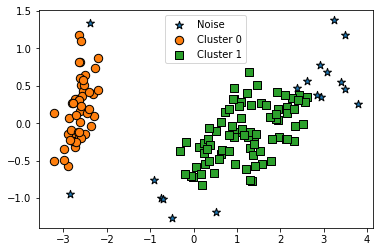

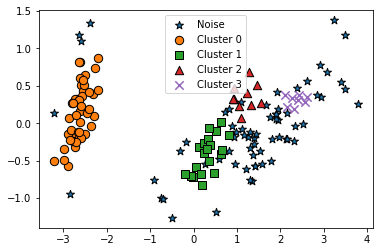

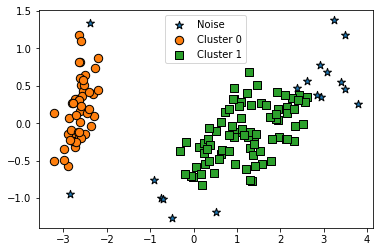

In [96]:
#PCA 사용시 노이즈도 시각화 가능

pca = PCA(n_components=2, random_state = 0)
pca_transformed = pca.fit_transform(iris.data)

iris_dbs['ftr1'] = pca_transformed[:,0]
iris_dbs['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, iris_dbs, 'cluster',iscenter=False)

#eps가 줄어들거나, min_samples가 늘어나면 노이즈 증가
dbscan = DBSCAN(eps=0.4, min_samples = 8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_dbs = irisDF.copy()
iris_dbs['cluster'] = dbscan_labels
iris_dbs['target'] = iris.target

iris_dbs['ftr1'] = pca_transformed[:,0]
iris_dbs['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, iris_dbs, 'cluster',iscenter=False)


dbscan = DBSCAN(eps=0.6, min_samples = 12, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_dbs = irisDF.copy()
iris_dbs['cluster'] = dbscan_labels
iris_dbs['target'] = iris.target

iris_dbs['ftr1'] = pca_transformed[:,0]
iris_dbs['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, iris_dbs, 'cluster',iscenter=False)

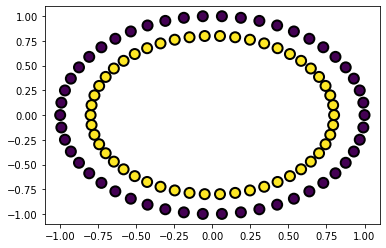

In [121]:
from sklearn.datasets import make_circles
import warnings
warnings.filterwarnings(action='ignore')

X, y = make_circles(n_samples=100, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.show()